1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [1]:
from scipy.stats import poisson
from scipy import stats

# average number of hurricanes per year
average = 6.3

# probability of observing 15 or more hurricanes in a single year
prob = 1 - poisson.cdf(15, average)
print("Probability of observing 15 or more hurricanes in a single year: ", prob)

# check if the probability is statistically significant (Z score of 3 or larger)
z_score = (15 - average) / (average ** 0.5)
print("Z Score: ", z_score)

# calculate the p-value as the sum of the left tail + the right tail
pvalue = stats.norm.cdf(-z_score) + (1. - stats.norm.cdf(z_score))
print("p-value =", pvalue)

if z_score >= 3:
    print("The difference beween the number of hurricanes in 2005 is significantly different from the historic average.")
else:
    print("The difference beween the number of hurricanes in 2005 is not significantly different from the historic average.")

Probability of observing 15 or more hurricanes in a single year:  0.0008444930803583883
Z Score:  3.4661629670697414
p-value = 0.0005279431738299246
The difference beween the number of hurricanes in 2005 is significantly different from the historic average.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

In [2]:
import numpy as np 

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = len(pre)
alpha = 0.05

# Calculate mean and variance
pre_mean = np.mean(pre)
pre_var = np.var(pre, ddof=1)
post_mean = np.mean(post)
post_var = np.var(post, ddof=1)

sigma=np.sqrt((pre_var + post_var)/2)

# T-test
t_stat = (pre_mean - post_mean) / (sigma * np.sqrt(2/n))
print("T: ",t_stat)

pvalue = stats.t.cdf(t_stat,n-1) + (1. - stats.t.cdf(-t_stat,n-1))
print("p-value =", pvalue)

if pvalue < alpha:
    print("The change was stathistically significant.")
else:
    print("The change was not stathistically significant.")

T:  -3.786997938137629
p-value = 0.004302464132864604
The change was stathistically significant.


3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

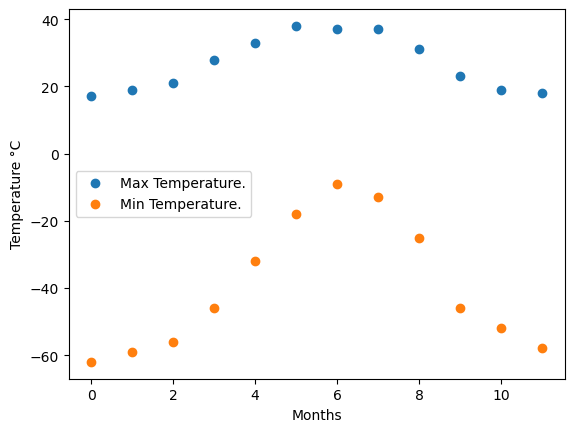

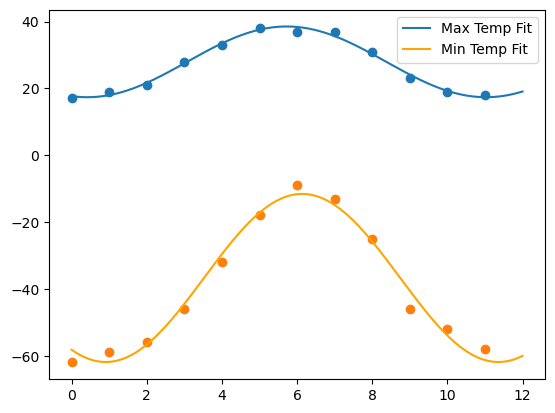

Time offset:  -0.45012007159500333


In [3]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Create data arrays
max_temp = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)

# Plot the data
plt.figure()
plt.plot(months, max_temp, 'o', label="Max Temperature.")
plt.plot(months, min_temp, 'o', label="Min Temperature.")
plt.xlabel('Months')
plt.ylabel('Temperature °C')
plt.legend()

def func(x, a, b, c, d):
    return a * np.sin(b * (x-c)) + d

# Fit the function to the data
params, params_covariance = curve_fit(func, months, max_temp, p0 = [25, 1, 1, 5])
params2, params_covariance2 = curve_fit(func, months, min_temp, p0 = [5, 1, 5, 5])

# Plot the data and the fit
days = np.linspace(0,12, 365)
plt.figure()
plt.plot(months, max_temp, 'o')
plt.plot(days, func(days, *params), label='Max Temp Fit', color = 'C0')
plt.plot(months, min_temp, 'o')
plt.plot(days, func(days, *params2), label='Min Temp Fit', color = "orange")
plt.legend()
plt.show()

# Is the fit reasonable? 
# Yes, the fit appears to be reasonable, as it follows the general trend of the data points.

# Is the time offset for min and max temperatures the same within the fit accuracy?
time_offset = params[2] - params2[2]
print("Time offset: ", time_offset)
# Yes, the offset between min and max temperatures is 0.50, which is within the fit accuracy

4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

,residuals,distances
0,1.100000,16.0
1,-1.950000,6.3
2,-7.200000,3.4
3,-4.150000,8.4
4,-6.590000,1.7
...,...,...
11126,-0.760000,14.4
11127,0.380000,7.5
11128,0.083333,1.7
11129,0.166667,19.1


<Figure size 640x480 with 0 Axes>

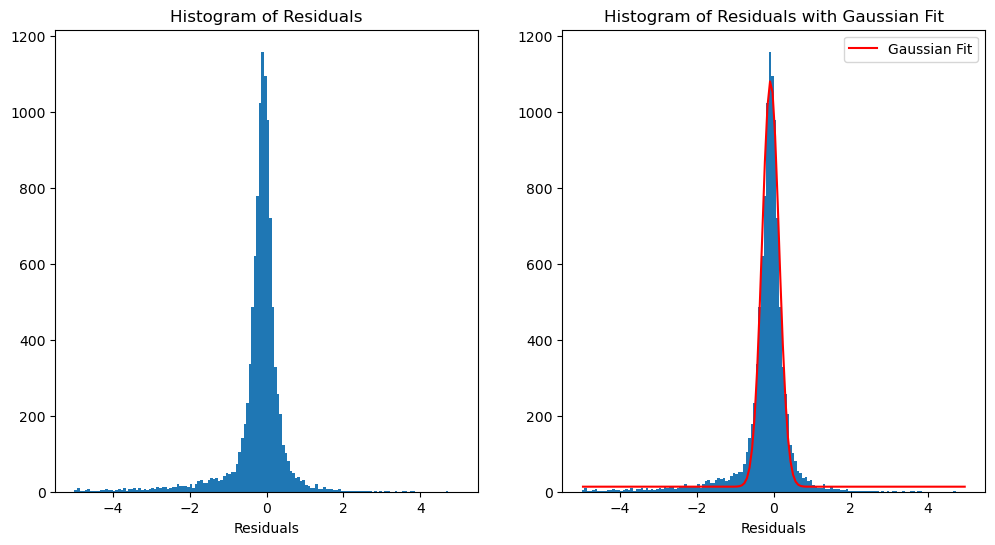

chi2 = 2360.537131963155
p-value:  0.0
The fit is considered unsatisfactor


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2

data = pd.read_pickle("./data/residuals_261.pkl").item()
    
# Convert the content to a Pandas Dataframe
df = pd.DataFrame(data, columns = ['residuals','distances'])

display(df)

nbins = 150

# Plot the histogram with the appropriate binning
plt.figure()
fig, axes = plt.subplots(1, 2 , figsize=(12, 6))
axes[0].hist(df['residuals'], bins = nbins, range = (-5,5))
axes[0].set_xlabel('Residuals')
axes[0].set_title('Histogram of Residuals')

# Calculate the Poisson uncertainty
bin_heights, bin_borders, _ = plt.hist(df["residuals"], bins = nbins, range = (-5,5))
bin_centers = (bin_borders[:-1] + bin_borders[1:])*0.5

poisson_uncertainty = np.sqrt(np.abs(bin_heights))
#print("Poisson Uncertainty: ", poisson_uncertainty)

# Define the gaussian function
def gaussian(x, a, mu, sigma, o):
    return a*np.exp(-(x-mu)**2/(2*sigma**2)) + o

#calcolo i parametri iniziali
mu = np.mean(df["residuals"])
sigma = np.std(df["residuals"])

# Fit the gaussian function to the histogram
params, params_covariance = curve_fit(gaussian, bin_centers, bin_heights, [max(df["residuals"]), mu, sigma, 0])

# Plot the fitted gaussian function
axes[1].hist(df["residuals"], bins = nbins, range = (-5,5), color ="C0")
axes[1].plot(bin_centers, gaussian(bin_centers, *params), label = "Gaussian Fit", color ="red")
axes[1].set_xlabel('Residuals')
axes[1].set_title('Histogram of Residuals with Gaussian Fit')
axes[1].legend()
plt.show()

# Calculate the chi-squared statistic
chi_squared = np.sum((bin_heights - gaussian(bin_centers, *params))**2 / gaussian(bin_centers, *params))
print("chi2 =", chi_squared)

# Calculate the p-value
ndof = nbins - 1
p_value = 1 - chi2.cdf(chi_squared, ndof)
print("p-value: ", p_value)

if(p_value < 0.05):
    print("The fit is considered unsatisfactor")
else:
    print("The fit is considered satisfactor")


5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

<Figure size 640x480 with 0 Axes>

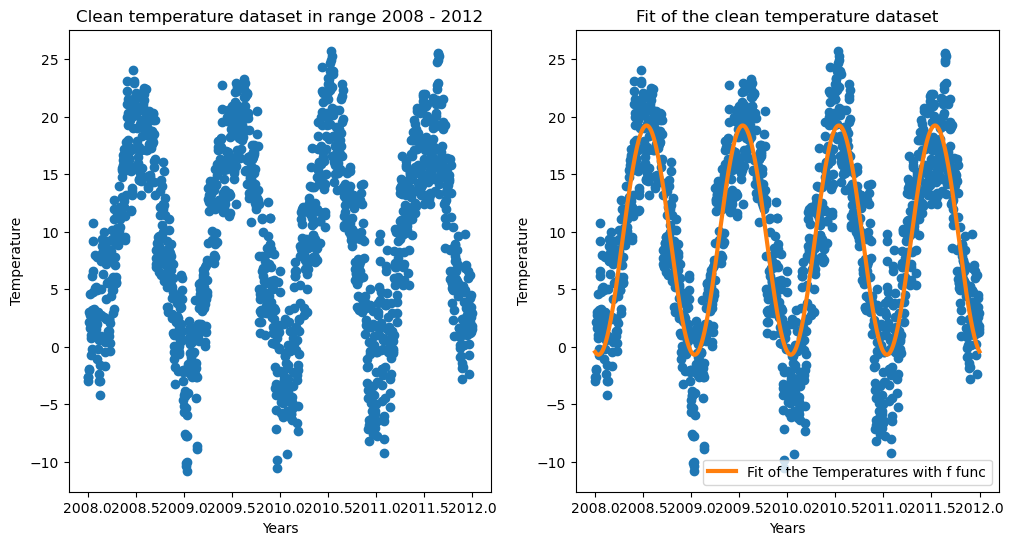

The best-fit value of the parameters (a,b,c) are:
a =  -9.96203467789479 
b =  12.331742857750834 
c =  9.262821311360776
the overall average temperature in Munich is:  9.262821311360776 °C
The typical daily average values predicted by the model for the hottest time of year is 19.224855989255566 °C
The typical daily average values predicted by the model for the coldest time of year is -0.6992133665340141 °C
The parameter b is within the cosine function and represents the phase shift of the function, it is necessary to correctly align the curve. 


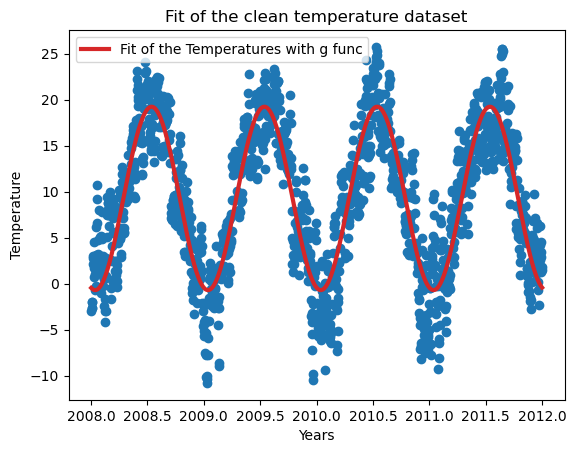

RSS of the function f:  18669.51539457836
RSS of the function g:  18669.225430686973
p-value: 0.881 , additional parameter necessary: NO
Therefore, from the results we can say that the addition of the parameter is not justified


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

# Load data
data = np.loadtxt('./data/munich_temperatures_average_with_bad_data.txt')
df = pd.DataFrame(data)
df.columns = ["years", "temperatures"]

df_selection = df[(df["years"] > 2008) & (df["years"] < 2012)].reset_index()
df_clean = df_selection.drop(df_selection[df_selection["temperatures"] > 85.].index).reset_index()

# Create numpy array with the two clean column
years = df_clean["years"].to_numpy()
temperatures = df_clean["temperatures"].to_numpy()

# First Plot of the data
plt.figure()
fig, axes = plt.subplots(1, 2 , figsize=(12, 6))
axes[0].plot(years, temperatures, 'o')
axes[0].set_xlabel("Years")
axes[0].set_ylabel("Temperature")
axes[0].set_title("Clean temperature dataset in range 2008 - 2012")


# Definition of f fit function
def fit_func_f(t, a, b, c):
    return a*np.cos(2*np.pi*t + b) + c

# Curve fit with f
popt_f, pcov_f  = curve_fit(fit_func_f, years, temperatures)

# Plot data and curve fit f
axes[1].plot(years, temperatures, 'o')
axes[1].plot(years, fit_func_f(years, *popt_f), linewidth = 3, label="Fit of the Temperatures with f func")
axes[1].set_xlabel('Years')
axes[1].set_ylabel('Temperature')
axes[1].set_title("Fit of the clean temperature dataset")
axes[1].legend()
plt.show()

print("The best-fit value of the parameters (a,b,c) are:\na = ", popt_f[0],"\nb = ", popt_f[1],"\nc = ",popt_f[2])

print("the overall average temperature in Munich is: ",popt_f[2],"°C")
print("The typical daily average values predicted by the model for the hottest time of year is", popt_f[2] - popt_f[0],"°C")
print("The typical daily average values predicted by the model for the coldest time of year is", popt_f[2] + popt_f[0],"°C")
print("The parameter b is within the cosine function and represents the phase shift of the function, it is necessary to correctly align the curve. ")

# Definition of g fit function
def fit_func_g(t, a, b, c, d):
    return a * np.cos(2 * np.pi * b * t + c) + d

# Curve fit with g
popt_g, pcov_g  = curve_fit(fit_func_g, years, temperatures)

# Plot data and curve fit g
plt.figure()
plt.plot(years, temperatures, 'o')
plt.plot(years, fit_func_g(years, *popt_g), linewidth = 3, label="Fit of the Temperatures with g func", c = "C3")
plt.xlabel('Years')
plt.ylabel('Temperature')
plt.title("Fit of the clean temperature dataset")
plt.legend()
plt.show()

# Compute the RSS
rss_f = np.sum((temperatures - fit_func_f(years, *popt_f))**2)
rss_g = np.sum((temperatures - fit_func_g(years, *popt_g))**2)

print("RSS of the function f: ", rss_f)
print("RSS of the function g: ", rss_g)

# define alpha
alpha = 0.05 # note that alpha could also be 0.10

# define a function that performes the F-test
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    pval = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("p-value: %.3f" % pval, ", additional parameter necessary:", "YES" if pval < alpha else "NO")
    return pval
ndof_f = 3
ndof_g = 4
# Calcolare il valore di F-test
f_test = Ftest(rss_f, rss_g, ndof_f, ndof_g, len(years), verbose=True)

print("Therefore, from the results we can say that the addition of the parameter is not justified")